# Diamond Price Prediction

In this project, we aim to predict the price of diamonds using various features like carat, cut, clarity, color, and dimensions. We'll employ regression models to make these predictions and evaluate their performance using multiple metrics.

We will use the [Diamonds Dataset](https://www.kaggle.com/shivam2503/diamonds) from Kaggle.

### 1. Data Loading and Exploration


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data=pd.read_csv('../../data/004/diamonds.csv')

In [3]:
print(data.shape)
data.head(5)

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [4]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

The dataset doesnt contain null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


The dataset contain 3 categorical features (cut, color and clarity)

these feature are ordinal, we need to label encode them to capture their ordinal relationship helping the models to better predict the price

In [6]:
#label encoding the categorical data 
cut_cat={
    'Fair':0, 
    'Good':1,
    'Very Good':2, 
    'Premium':3,
    'Ideal':4
}
color_cat={
    'J':0,
    'I':1, 
    'H':2, 
    'G':3, 
    'F':4,
    'E':5,
    'D':6
}
clarity_cat={
    'SI2':1, 
    'SI1':2, 
    'VS1':4, 
    'VS2':3, 
    'VVS2':5, 
    'VVS1':6, 
    'I1':0, 
    'IF':7
}


In [7]:
data['clarity']=data['clarity'].apply(lambda x : clarity_cat[x])
data['color']=data['color'].apply(lambda x : color_cat[x])
data['cut']=data['cut'].apply(lambda x : cut_cat[x])

we remove `Unnamed: 0` column because its irrelevant for the precition 
and extract the `price` as it is the target we are trying to predict

In [8]:
y=data['price']
X=data.drop(['Unnamed: 0','price'],axis=1)

In [9]:
X.head(10)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,5,1,61.5,55.0,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,3.94,3.96,2.48
6,0.24,2,1,6,62.3,57.0,3.95,3.98,2.47
7,0.26,2,2,2,61.9,55.0,4.07,4.11,2.53
8,0.22,0,5,3,65.1,61.0,3.87,3.78,2.49
9,0.23,2,2,4,59.4,61.0,4.00,4.05,2.39


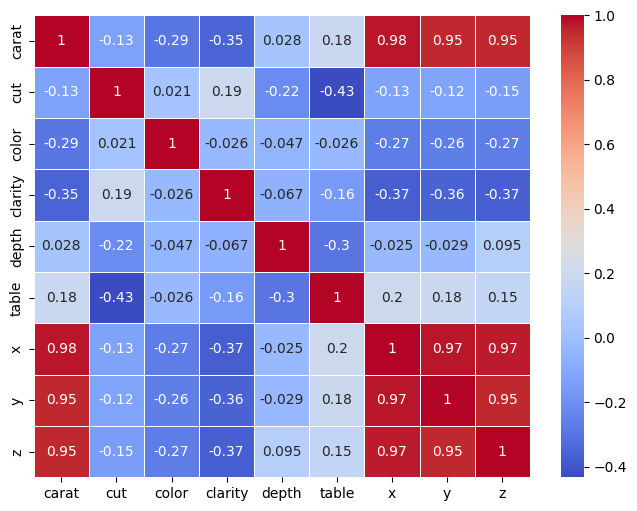

In [10]:
corr_mat=X.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat,cmap="coolwarm",linewidths=0.5,annot=True)
plt.show()

we remove the `x`,`y`,`z` columns since they are highly correlated with the `carat` column (the bigger the dimensions the heavier the diamond is) 

In [11]:
X.drop(columns=['x','y','z'],axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 6)
(10788, 6)
(43152,)
(10788,)


In [14]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error,
    mean_absolute_percentage_error, explained_variance_score, max_error
)

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression

In [16]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
lr.score(X_test,y_test)

0.9032892521890851

In [18]:
ridge=Ridge(alpha=1)
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [19]:
ridge.score(X_test,y_test)

0.9032897099853326

In [20]:
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [21]:
lasso.score(X_test,y_test)

0.9032966194020103

In [22]:

en=ElasticNet()
en.fit(X_train,y_train)
en.score(X_test,y_test)

0.7717909769185471

In [23]:
br= BayesianRidge()
br.fit(X_train,y_train)
br.score(X_test,y_test)

0.9032894778645302

In [24]:
ardr=ARDRegression()
ardr.fit(X_train,y_train)
ardr.score(X_test,y_test)

0.9032900303851451

In [30]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train,y_train)
svr.score(X_test,y_test)
#nul

0.4326878852803512

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.9806736403808038

In [27]:
y_pred=rfr.predict(X_test)

In [28]:
print("Mean Squared Error (MSE):",root_mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))
print("Mean Squared Log Error (MSLE):", mean_squared_log_error(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_pred))
print("Explained Variance Score:", explained_variance_score(y_test, y_pred))
print("Max Error:", max_error(y_test, y_pred))

Mean Squared Error (MSE): 554.2812356279027
Mean Absolute Error (MAE): 279.93140177822323
R-squared (R2): 0.9806736403808038
Mean Squared Log Error (MSLE): 0.012183423594583579
Mean Absolute Percentage Error (MAPE): 0.0820420280539678
Explained Variance Score: 0.9806772603372007
Max Error: 6159.76


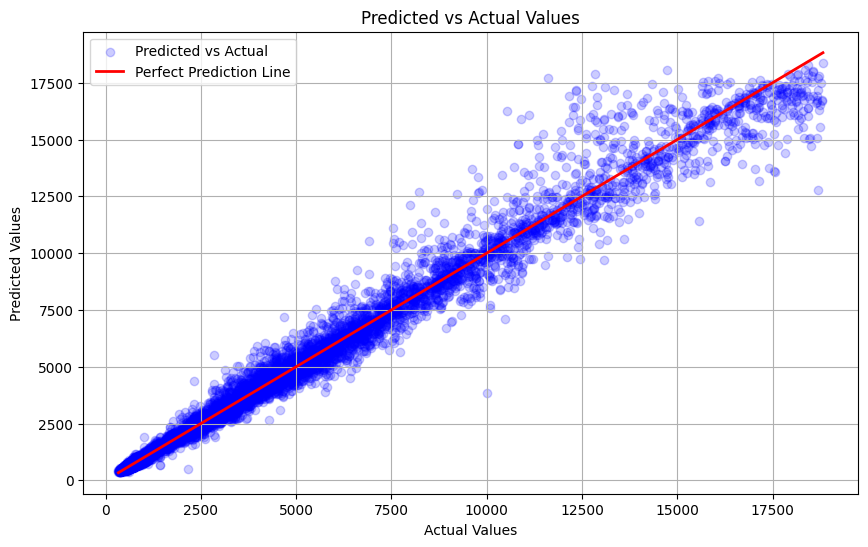

In [29]:
y_test_values = y_test.values  

y_pred_values = y_pred  

plt.figure(figsize=(10, 6))
plt.scatter(y_test_values, y_pred_values, color='blue', alpha=0.2, label='Predicted vs Actual')
plt.plot([min(y_test_values), max(y_test_values)], [min(y_test_values), max(y_test_values)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

After training multiple regression models , we got good R2 scores for most of them *(~90"%)* with `RandomForestRegressor` performing the best *98%* and SVR the worst with *45%* score